# House Price of Area Prediction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
df = pd.read_csv("/content/drive/MyDrive/영우_4기_딥러닝/dataset/house_price_of_unit_area.csv")

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB
None


In [3]:
df.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
x_data = df.copy()
tf.random.set_seed(777) # random seed를 고정해줘서 돌릴때마다 랜덤값을 고정

In [5]:
y_data = x_data.pop("house price of unit area")

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=5, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


In [10]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.04) 
loss=tf.keras.losses.mean_squared_error 
metrics=tf.keras.metrics.RootMeanSquaredError() 

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [11]:
result = model.fit(x_data, y_data, epochs=100, batch_size=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 9846.7002 - root_mean_squared_error: 99.2305
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 1352.0897 - root_mean_squared_error: 36.7708
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 589.3423 - root_mean_squared_error: 24.2764
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 235.6337 - root_mean_squared_error: 15.3504
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 188.5344 - root_mean_squared_error: 13.7308
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 185.0643 - root_mean_squared_error: 13.6038
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 185.3429 - root_mean_squared_error: 13.6141
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 184.9622 - root_mean_squared_error: 13.6001
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 185.567

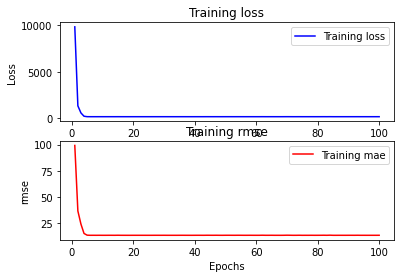

In [12]:
loss = result.history['loss']

# loss 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae)+1)

# mean absolute error 그래프화
plt.subplot(212)
plt.plot(epochs, mae, 'r-', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

In [13]:
# x_data -> model -> predict값 - y_data값을 추출

print(model.evaluate(x_data, y_data))
print("\n Test rmse : %.4f" % (model.evaluate(x_data, y_data)[1]))

13/13 [==============================] - 0s 2ms/step - loss: 185.7198 - root_mean_squared_error: 13.6279
[185.7197723388672, 13.627903938293457]
13/13 [==============================] - 0s 1ms/step - loss: 185.7198 - root_mean_squared_error: 13.6279

 Test rmse : 13.6279
